## Predicting Insurance Premium

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Step 1: Load the Data

In [ ]:
# Lets Load The data
data = pd.read_csv(r'C:\Users\hp\Desktop\Data-Science\06. Data Science 3MTT-Modules\Capstone Projects\Capstone 1 - Predicting Insurance Premiums with Data-Driven Insights for SecureLife Insurance Co\Insurance Premium Prediction Dataset.csv')

## Explore the Data

In [3]:
print(data.head())
print(data.info())
print(data.isnull().sum())

    Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  56.0    Male        99990.0        Married                   1.0   
1  46.0    Male         2867.0         Single                   1.0   
2  32.0  Female        30154.0       Divorced                   3.0   
3  60.0  Female        48371.0       Divorced                   0.0   
4  25.0  Female        54174.0       Divorced                   0.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0        Master's            NaN     31.074627     Urban  Comprehensive   
1      Bachelor's            NaN     50.271335     Urban  Comprehensive   
2      Bachelor's            NaN     14.714909  Suburban  Comprehensive   
3             PhD  Self-Employed     25.346926     Rural  Comprehensive   
4     High School  Self-Employed      6.659499     Urban  Comprehensive   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              NaN           13         320.0        

## Data Cleaning

In [ ]:
# Lets Check the shape of the Data
data.shape

(278860, 20)

In [ ]:
# Drop rows with missing values
data = data.dropna()  

In [6]:
# Checking for data types
data.dtypes

Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age               int64
Credit Score            float64
Insurance Duration        int64
Premium Amount          float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
dtype: object

In [7]:
# Checking for missing values
print(data.isnull().sum())

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Premium Amount          0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
dtype: int64


In [8]:
# Checking for duplicates
print(f"Duplicate rows: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)

Duplicate rows: 0


In [ ]:
#Lets check the data shape
data.shape

(92985, 20)

## Data Analysis

In [10]:
age_premium = data.groupby('Age')['Premium Amount'].mean().reset_index()
print(age_premium)

     Age  Premium Amount
0   18.0      967.648414
1   19.0      949.644302
2   20.0      938.413360
3   21.0      949.077961
4   22.0      944.979146
5   23.0      937.683029
6   24.0      986.098284
7   25.0      981.935351
8   26.0      972.520541
9   27.0      971.806112
10  28.0      969.931807
11  29.0      959.938308
12  30.0      998.575448
13  31.0      957.854527
14  32.0      945.719525
15  33.0      981.846686
16  34.0      936.670547
17  35.0      962.861111
18  36.0      956.343137
19  37.0     1014.121500
20  38.0      966.185167
21  39.0     1003.004012
22  40.0      985.803941
23  41.0      958.696410
24  42.0      996.375461
25  43.0      964.581430
26  44.0      990.939096
27  45.0      964.955188
28  46.0      958.471976
29  47.0      947.448311
30  48.0      967.020854
31  49.0      938.718164
32  50.0      953.951256
33  51.0      955.929353
34  52.0     1000.157150
35  53.0      984.529032
36  54.0      985.278094
37  55.0      970.937563
38  56.0     1002.835424


## Data Visualization

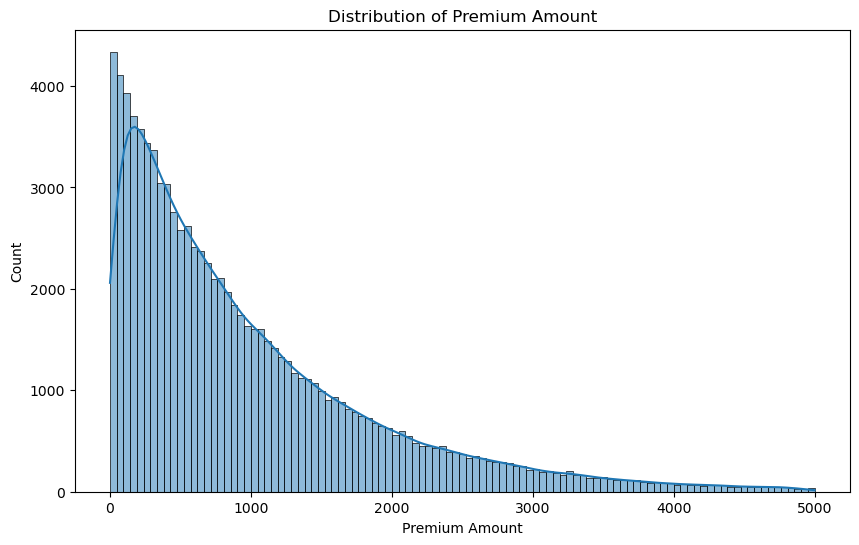

In [ ]:
# Ploting distributions
plt.figure(figsize=(10, 6))
sns.histplot(data['Premium Amount'], kde=True)
plt.title("Distribution of Premium Amount")
plt.show()

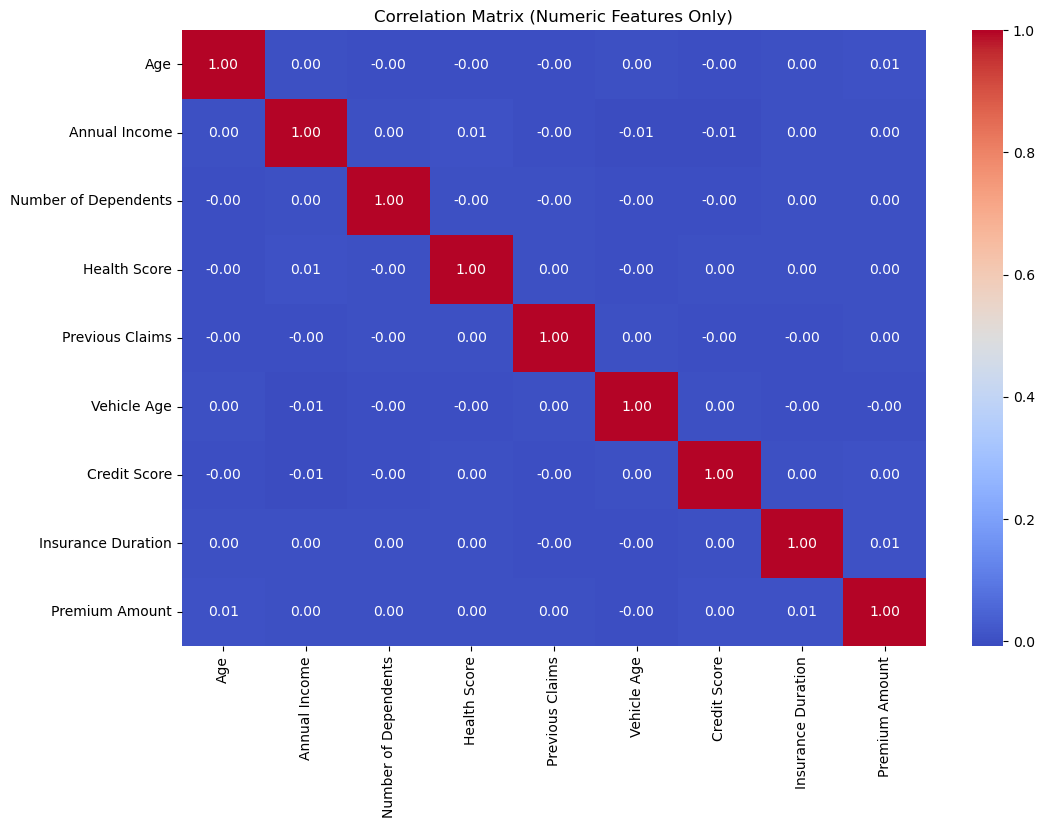

In [ ]:
# Correlation heatmap (for us to show which feature strongly influence premium)
# Selecting only numeric columns for correlation inwhich select_dtypes will exclude columns like Gender, occupation etc
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Ploting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

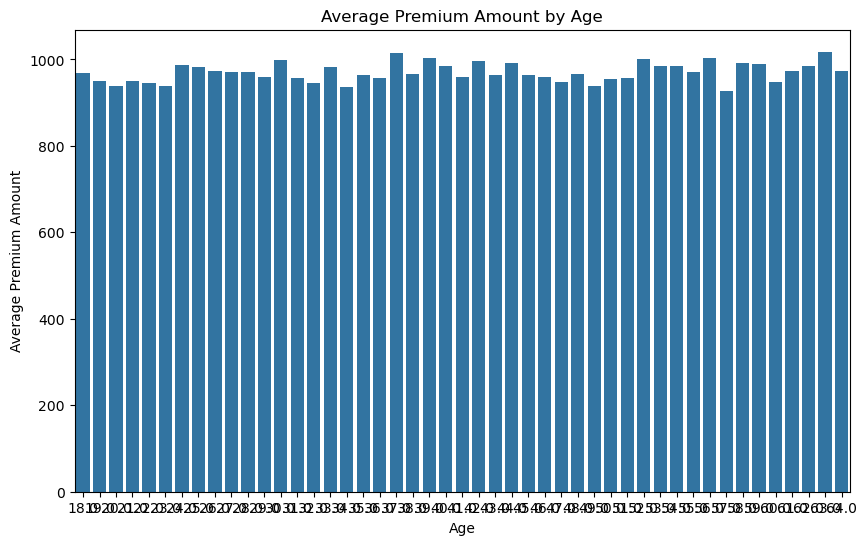

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=age_premium, x='Age', y='Premium Amount')
plt.title('Average Premium Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Premium Amount')
plt.show()

## Feature Engineering

In [14]:
# Encodeing categorical variables like Gender, Smoking Status using one-hot encoding
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Smoking Status', 'Exercise Frequency', 'Property Type']
data_encoded = pd.get_dummies(data, columns=categorical_cols)
categorical_cols

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

## Building a Prediction Model

In [15]:
X = data[['Age', 'Annual Income', 'Health Score']]  # Features
y = data['Premium Amount']  # Target

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Using LinearRegression Model First

In [17]:
# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [18]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Mean Absolute Error: 698.763542090839
R² Score: 6.30010538813508e-05


## Predicting For a Single Customer

In [19]:
# Creating a dictionary with the new customer's data
new_customer = {
    'Age': 45,
    'Annual Income': 75000,
    'Health Score': 82
}

# Lets Convert to DataFrame (model expects this format)
new_data = pd.DataFrame([new_customer])

# Making prediction
predicted_premium = model.predict(new_data)

print(f"Predicted Insurance Premium: ${predicted_premium[0]:.2f}")

Predicted Insurance Premium: $980.92


## A Prediction Function for resuable

In [20]:
def predict_premium(age, income, health_score):
    """
    Predict insurance premium based on customer attributes
    
    Parameters:
    age (int): Customer age
    income (float): Annual income
    health_score (int): Health score (0-100)
    
    Returns:
    float: Predicted premium amount
    """
    customer_data = pd.DataFrame({
        'Age': [age],
        'Annual Income': [income],
        'Health Score': [health_score]
    })
    return model.predict(customer_data)[0]

# Example usage
premium = predict_premium(35, 60000, 75)
print(f"Predicted Premium: ${premium:.2f}")

Predicted Premium: $975.20


## Saving the model for future use

In [21]:
import joblib

# Saving the model
joblib.dump(model, 'insurance_premium_predictor.pkl')

# Later, we can load it with:
# model = joblib.load('insurance_premium_predictor.pkl')

['insurance_premium_predictor.pkl']